# Machine learning on titanic dataset

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

sns.set(style="dark")

In [124]:
train = pd.read_csv('train.csv')
test_final = pd.read_csv('test.csv')

# Apply adjustments to data

In [125]:
#Check missing values
train.isnull().sum()

#Clean missing values for train
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna('Missing', inplace=True)


#Clean missing values for test
test_final['Age'].fillna(test_final['Age'].median(), inplace=True)
test_final['Fare'].fillna(test_final['Fare'].median(), inplace=True)
test_final['Embarked'].fillna('Missing', inplace=True)


#Convert to numeric
train['Sex_ind'] = np.where(train['Sex']=='male', 1, 0)
test_final['Sex_ind'] = np.where(test_final['Sex']=='male', 1, 0)


train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# High level summaries

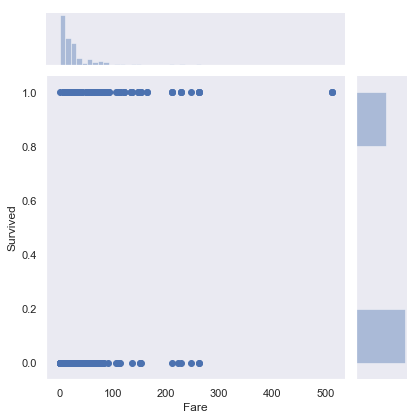

In [152]:
sns.jointplot(x="Fare", y="Survived", data=train);

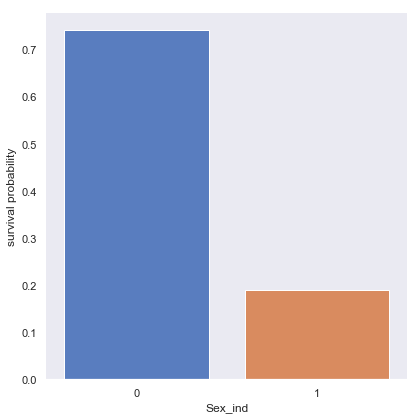

In [148]:
# Examine proportion survived based on characteristics

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Sex_ind", y="Survived", data=train,
                height=6, kind="bar", palette="muted", ci=None)
g.despine(left=True)
g.set_ylabels("survival probability")

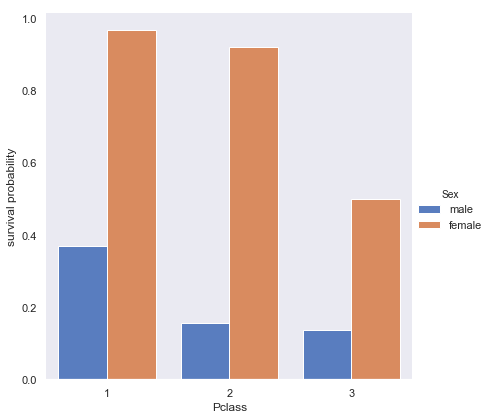

In [103]:
# Examine proportion survived based on characteristics

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=train,
                height=6, kind="bar", palette="muted", ci=None)
g.despine(left=True)
g.set_ylabels("survival probability")

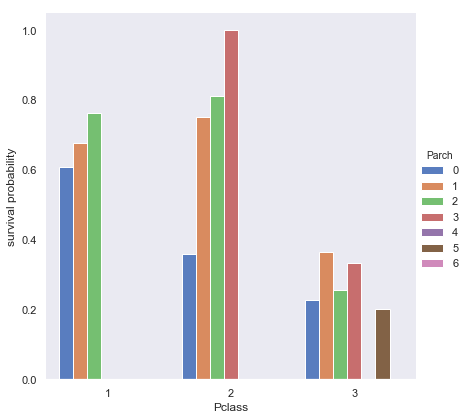

In [104]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Pclass", y="Survived", hue="Parch", data=train,
                height=6, kind="bar", palette="muted", ci=None)
g.despine(left=True)
g.set_ylabels("survival probability")

# Decision Tree Classification

In [111]:
# Import packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [136]:
target = ['Survived']
predictors = ['Pclass','Sex_ind','Age','SibSp','Parch','Fare']
              
X = train[predictors]
y = train[target]

# Set SEED for reproducibility
SEED = 1

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeClassifier(max_depth=10, criterion='entropy', random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.79


# Random Forest Classification

In [137]:
# Import packages

from sklearn.ensemble import RandomForestClassifier

SEED = 1

Test set accuracy: 0.77


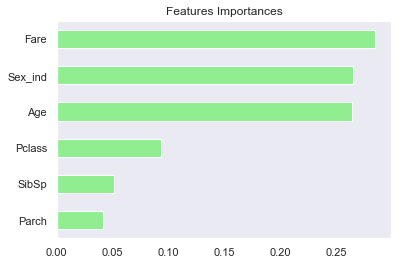

In [139]:
# Set up data
target = ['Survived']
predictors = ['Pclass','Sex_ind','Age','SibSp','Parch','Fare']
              
X = train[predictors]
y = train[target]

# Instantiate rf
rf = RandomForestClassifier(n_estimators=25,
            random_state=SEED)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Predict
y_pred = rf.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

# Ensemble Classification

In [155]:
# Import packages
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.ensemble import VotingClassifier



In [160]:
# Set seed for reproducibility
SEED = 1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=50)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.1, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, stratify = y, random_state= SEED)

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

    
    
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Logistic Regression : 0.821
K Nearest Neighbours : 0.682
Classification Tree : 0.804
Voting Classifier: 0.799


# Submission

In [158]:
# Set up data
test_output = test_final[predictors]

# Predict test dataset
test_final['Survived'] = vc.predict(test_output)

results = test_final[['PassengerId', 'Survived']]

results.to_csv('submission.csv', index=False)